<a href="https://colab.research.google.com/github/doguma/S1P_CodeStates/blob/main/S1P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Section 1 Project -  S1P** : Intro to DS

# **"다음 분기에는 어떤 게임을 설계해야 할까?"**

**Hannah Do (도현진)**

July 29th, 2021




---

In [126]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [108]:
df.info()

# Year column을 제외한 숫자형 column들이 object datatype인 것을 발견

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [109]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [134]:
# K나 M이 섞여 있는 경우 값 바꾸는 함수

def no_KM(string):
  temp = ''
  string = str.strip(string)

  if 'K' in string:
    temp = string.replace('K','')
    
    return float(temp)/1000

  elif 'M' in string:
    temp = string.replace('M','')
    return float(temp)

  else:
    temp = string
    return float(temp)


In [135]:
df['NA_Sales'] = df['NA_Sales'].apply(no_KM)
df['EU_Sales'] = df['EU_Sales'].apply(no_KM)
df['JP_Sales'] = df['JP_Sales'].apply(no_KM)
df['Other_Sales'] = df['Other_Sales'].apply(no_KM)

df.describe()
# 필요한 열들의 수치/분배 확인

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.492191,0.264667,0.146652,0.077782,0.048063
std,6.376690,0.816683,0.505351,0.309291,0.188588
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2098.000000,41.490000,29.020000,10.220000,10.570000


In [132]:
# Year 값이 100보다 작다면 2000을 더해서 다른 데이터들과 맞춰주는 함수 - 끝자리 수가 중요할 수 있기 때문에 2000을 더하는 방법으로 선택!
df['Year'] = np.where(df['Year']<100, df['Year'] + 2000, df['Year'])

In [133]:
# 100보다 작은 랜덤한 값들이 더이상 없음
df['Year'].min()

1980.0

## 1. **지역에 따라 선호하는 게임 장르가 다를까?**

In [68]:
df_location = df[['Genre', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
df_location = df_location.dropna()
df_location

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


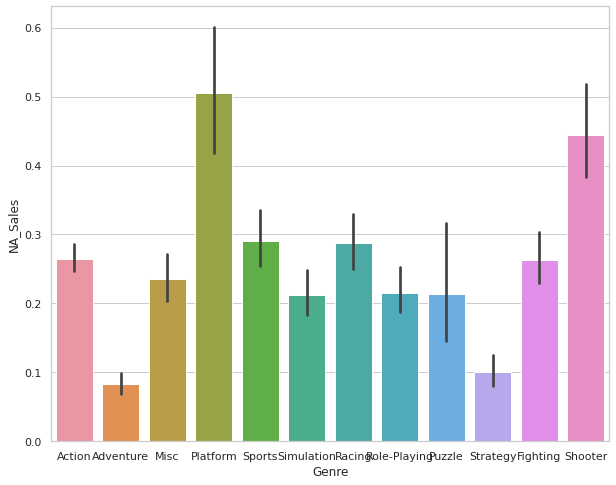

In [70]:
import seaborn as sns
from matplotlib import pyplot

sns.set_theme(style="whitegrid")

fig, ax = pyplot.subplots(figsize=(10, 8))

ax = sns.barplot(ax=ax, x="Genre", y="NA_Sales", data=df_location)

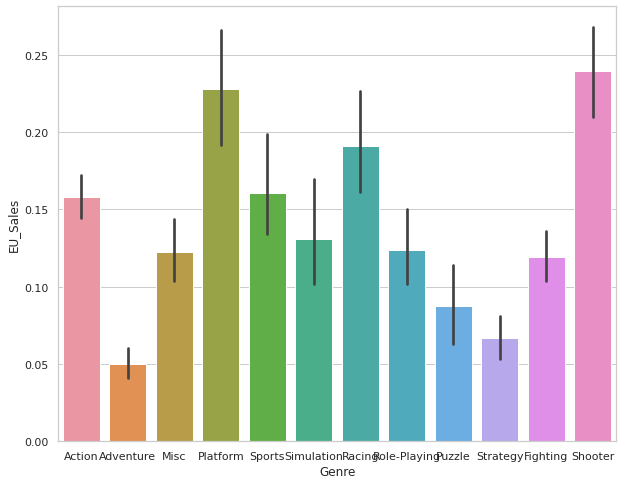

In [71]:
fig2, ax2 = pyplot.subplots(figsize=(10, 8))

ax2 = sns.barplot(ax=ax2, x="Genre", y="EU_Sales", data=df_location)

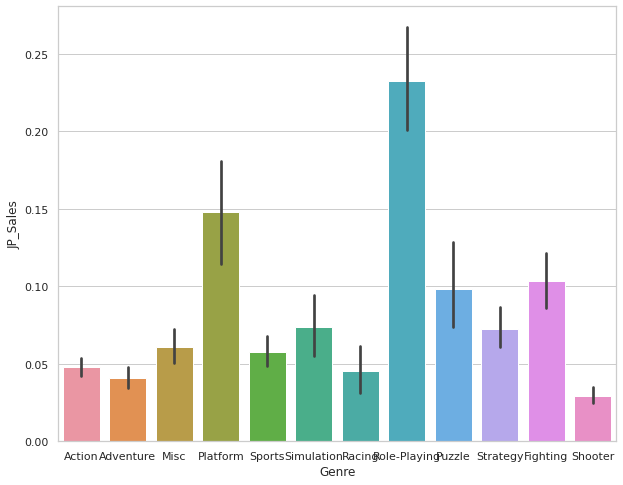

In [72]:
fig3, ax3 = pyplot.subplots(figsize=(10, 8))

ax3 = sns.barplot(ax=ax3, x="Genre", y="JP_Sales", data=df_location)

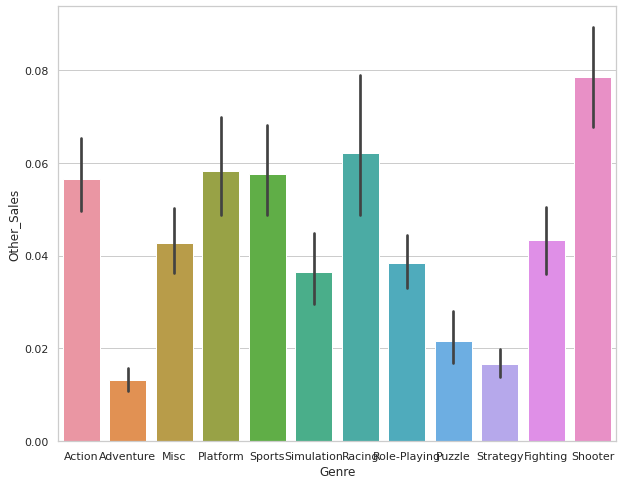

In [73]:
fig4, ax4 = pyplot.subplots(figsize=(10, 8))

ax4 = sns.barplot(ax=ax4, x="Genre", y="Other_Sales", data=df_location)

In [74]:
genre_data = df_location.groupby("Genre").sum().sort_values(by=['NA_Sales'], ascending=False)
genre_data

# NA Sales (북미 판매량)이 제일 많기 때문에 그 기준으로 내림차순을 만들었을 때, Action, Sports, Shooter, Platform, Racing, Role-Playing (6가지) 게임종목들이 가장 인기있다는 걸 확인할 수 있었다.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Sports,680.52,376.48,135.37,134.67
Shooter,581.92,313.05,38.28,102.65
Platform,446.44,201.61,130.65,51.53
Misc,408.05,212.36,105.27,74.04
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Fighting,223.20,101.22,87.34,36.64
Simulation,182.96,113.35,63.70,31.48


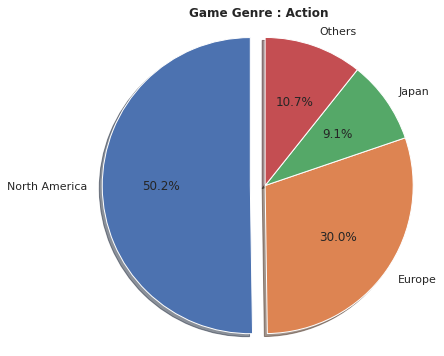

In [105]:
import matplotlib.pyplot as plt

labels = 'North America', 'Europe', 'Japan', 'Others'
sizes = [874.81,	522.16,	157.90,	186.45]
explode = (0.1, 0, 0, 0)

fig1, ax_pie1 = plt.subplots(figsize=(6, 6))
ax_pie1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_pie1.axis('equal')
plt.title('Game Genre : Action', fontweight='bold')

plt.show()

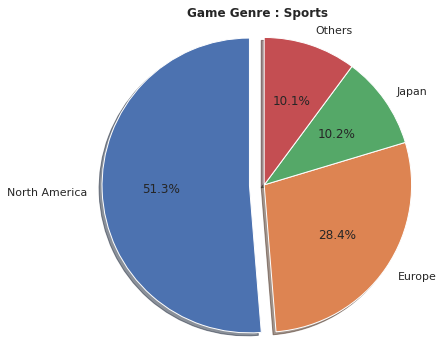

In [104]:

sizes = [680.52,	376.48,	135.37,	134.67]
explode = (0.1, 0, 0, 0)

fig3, ax_pie3 = plt.subplots(figsize=(6,6))
ax_pie3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_pie3.axis('equal')
plt.title('Game Genre : Sports', fontweight='bold')

plt.show()

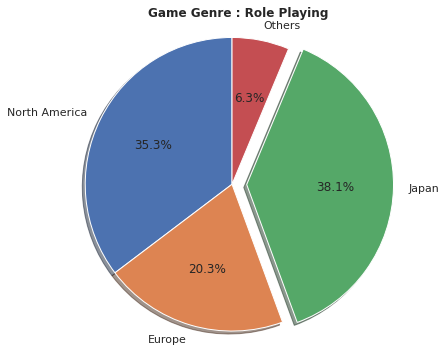

In [103]:
sizes2 = [319.54,	183.58,	344.95,	56.96]
explode2 = (0, 0, 0.1, 0)

fig1, ax_pie2 = plt.subplots(figsize=(6,6))
ax_pie2.pie(sizes2, explode=explode2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_pie2.axis('equal')
plt.title('Game Genre : Role Playing', fontweight='bold')


plt.show()



> **북미(NA)와 유럽(EU)은 인기 게임종목 순위나 동향이 비슷하다는 걸 볼 수 있었다. 두 지역은 Action, Sport, Shooter, Platform, Racing 순으로 인기가 많았고, 반면 일본은 Role-Playing이 압도적인 1위를 차지했고 다음으로는 Platform이 공통적으로 세 지역에서 비슷한 비중으로 인기가 있었다.**



---

## 2. **연도별 게임의 트렌드가 있을까?**

In [136]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
Sprint 2 : Hypothesis Test, CI, Bayesian
Sprint 3 : DR, PCA, Cluster

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.